### Install necessary libraries
#### If the libraries are not installed, please uncomment the code cell below and run

In [ ]:
# ! pip install numpy 

In [1]:
import sklearn
sklearn.__version__

'0.20.1'

### Import the necessary libraries

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

### Fetch the MNIST dataset

In [ ]:
# WONT WORK WITH OLDER VERSIONS OF SCIKIT-LEARN
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [19]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### Normalization of data

In [20]:
X = None

### Preparing the dataset

In [33]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [34]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

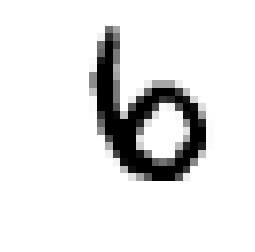

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [35]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

### Loss function

In [36]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = None
    m = None
    L = None

    return L

### Try the efficient loss function as well

In [ ]:
def compute_multiclass_loss_efficient(Y, Y_hat):

    L_sum = None
    m = None
    L = None

    return L

### Train the model

In [37]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = None
    A1 = None
    Z2 = None
    A2 = None

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = None
    dW2 = None
    db2 = None

    dA1 = None
    dZ1 = None
    dW1 = None
    db1 = None

    W2 = None
    b2 = None
    W1 = None
    b1 = None

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  10.00668096750188
Epoch 100 cost:  0.7400262841712076
Epoch 200 cost:  0.5564448357884664
Epoch 300 cost:  0.4778877776937
Epoch 400 cost:  0.43071190874754156
Epoch 500 cost:  0.3980692551057553
Epoch 600 cost:  0.37341115379590345
Epoch 700 cost:  0.35372663489632555
Epoch 800 cost:  0.33742607140024583
Epoch 900 cost:  0.3235559078634579
Epoch 1000 cost:  0.3115172539532579
Epoch 1100 cost:  0.30090655554928014
Epoch 1200 cost:  0.2914330801312082
Epoch 1300 cost:  0.2828780867095152
Epoch 1400 cost:  0.27507215125109147
Epoch 1500 cost:  0.26788645458127935
Epoch 1600 cost:  0.26122571479415585
Epoch 1700 cost:  0.25501856037348075
Epoch 1800 cost:  0.24920987738949338
Epoch 1900 cost:  0.24375607628705964
Final cost: 0.238671269571095


### Predictions

In [38]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))

[[ 941    0   10    3    1    9   14    2   11    6]
 [   0 1105    4    1    1    0    3   15    4    5]
 [   4    2  925   17    6    3    9   26    8    4]
 [   2    6   25  926    1   40    1    4   24   13]
 [   1    0   11    1  907    5   11    8   10   25]
 [  11    2    5   22    1  793   12    2   22   10]
 [  10    6   11    1   11    9  900    1   10    2]
 [   7    2   20   10    5    5    2  946    7   20]
 [   3   12   19   23    8   21    6    3  865   14]
 [   1    0    2    6   41    7    0   21   13  910]]


In [39]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       997
           1       0.97      0.97      0.97      1138
           2       0.90      0.92      0.91      1004
           3       0.92      0.89      0.90      1042
           4       0.92      0.93      0.93       979
           5       0.89      0.90      0.90       880
           6       0.94      0.94      0.94       961
           7       0.92      0.92      0.92      1024
           8       0.89      0.89      0.89       974
           9       0.90      0.91      0.91      1001

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## 92% Accuracy